# About CIFAR-10 dataset

In [ ]:
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
0-Airplanes
1-Cars
2-Birds
3-Cats
4-Deer
5-Dogs
6-Frogs
7-Horses
8-Ships
9-Trucks

## I choose CIFAR 10 dataset to experiment my deep learning theory for the below reasons

 ->CIFAR 10 is a bit challenging since it has 60K images, which is a lot for a begginer.
 ->The images are compressed so that they can be trained with less computational power.
 ->CIFAR 10 is very popular so that if I was struck at some point I can easily get lot of help from community.
 ->I dont need to deal with the hasle of downloading and handeling the data by writing python code. The data is readily available in keras datasets so that I can focus on the deep learning algorithm rather than the data cleanin

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

## Visualization 

[2]


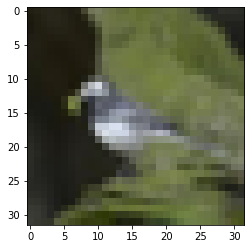

In [5]:
i = 5005
plt.imshow(X_train[i])
print(Y_train[i])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


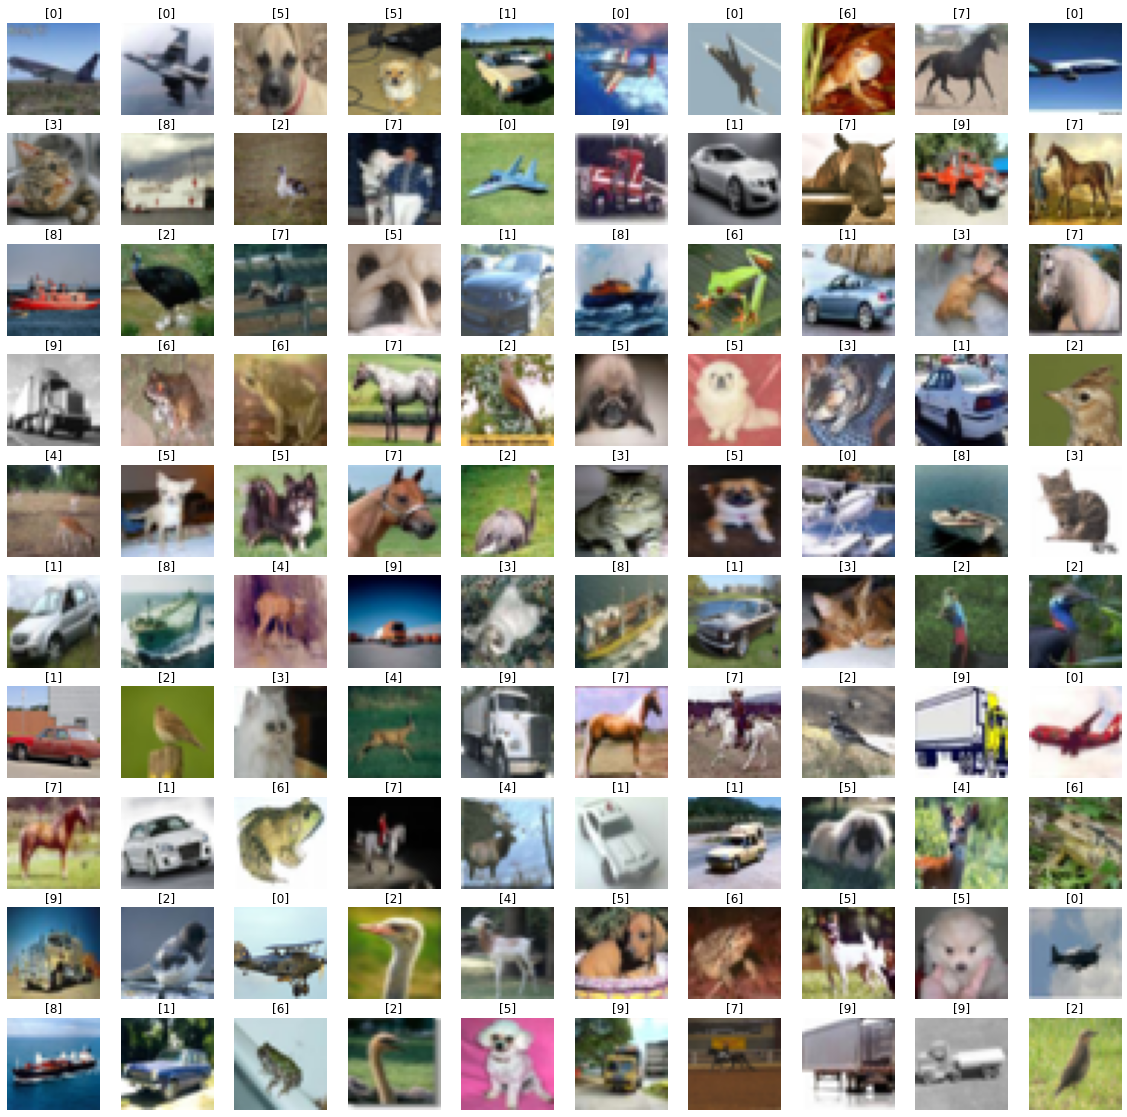

In [6]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid,W_grid, figsize = (20,20))
axes = axes.ravel()

N_train = len(X_train)

for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0,N_train)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')

## Data preparation 

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
num_categories = 10

In [9]:
import keras
Y_train = keras.utils.to_categorical(Y_train,num_categories)
Y_test = keras.utils.to_categorical(Y_test,num_categories)

In [10]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [11]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
Input_shape = X_train.shape[1:]

In [16]:
Input_shape

(32, 32, 3)

## Training the model 

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [18]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu',input_shape = Input_shape),
    Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'),
    Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'),
    Dropout(0.4),
    Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu'),
    Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),
    Flatten(),
    Dense(units = 256,activation = 'relu'),
    Dense(units = 128,activation = 'relu'),
    Dropout(0.5),
    Dense(units = 10,activation = 'softmax')    
])

In [19]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics =['accuracy']) 

history = model.fit(X_train,Y_train,batch_size = 32, epochs = 40, shuffle=True)

## Evaluation

In [21]:
evaluation = model.evaluate(X_test,Y_test)
print('Test Accuracy : {}'.format(evaluation[1]))

313/313 [==============================] - 4s 11ms/step - loss: 0.9058 - accuracy: 0.6937
Test Accuracy : 0.6937000155448914


In [22]:
predictions = model.predict(X_test)
predictions.round()

313/313 [==============================] - 4s 12ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [23]:
predictions = predictions.argmax(1)

In [24]:
predictions

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [25]:
Y_test = Y_test.argmax(1)

In [26]:
Y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test,predictions)
accuracy = accuracy_score(Y_test, predictions)

In [28]:
print(cm)

[[639  10  56  25  42   2  36  10 160  20]
 [ 16 759   1  10   4   4  41   2  46 117]
 [ 50   1 494  53 151  65 140  22  19   5]
 [  7   1  29 392 112 157 259  20  18   5]
 [ 15   0  26  30 747  16 105  47  12   2]
 [  2   0  30 180  62 591  89  35   6   5]
 [  2   0  13  20  44  10 907   2   2   0]
 [  8   0  24  40 104  70  38 704   2  10]
 [ 32  13   7  19   9   1  24   4 878  13]
 [ 15  30   4  16  14   2  38   8  47 826]]


In [29]:
print(accuracy)

0.6937


<AxesSubplot:>

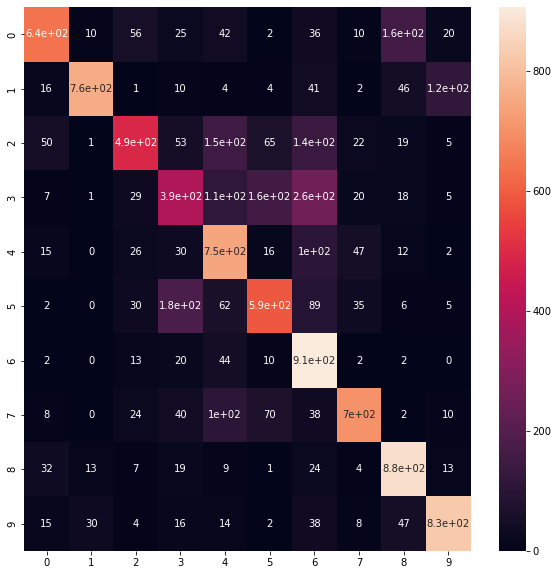

In [30]:
import seaborn as sns
cm = confusion_matrix(Y_test,predictions)
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot = True)


<AxesSubplot:>

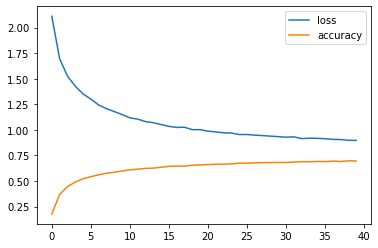

In [31]:
pd.DataFrame(history.history).plot()

## Training the model again by implementing batch normalization 

In [33]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu',input_shape = Input_shape),
    BatchNormalization(),
    Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),
    Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'),
    BatchNormalization(),
    Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu'),
    BatchNormalization(),
    Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.4),
    Flatten(),
    Dense(units = 256,activation = 'relu'),
    BatchNormalization(),
    Dense(units = 128,activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units = 10,activation = 'softmax')    
])

In [34]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics =['accuracy']) 

In [35]:
history_2 = model.fit(X_train,Y_train,batch_size = 32, epochs = 40, shuffle=True)

Epoch 1/40
1563/1563 [==============================] - 179s 112ms/step - loss: 1.7510 - accuracy: 0.3880
Epoch 2/40
1563/1563 [==============================] - 173s 110ms/step - loss: 1.2259 - accuracy: 0.5675
Epoch 3/40
1563/1563 [==============================] - 159s 102ms/step - loss: 1.0453 - accuracy: 0.6351
Epoch 4/40
1563/1563 [==============================] - 155s 99ms/step - loss: 0.9475 - accuracy: 0.6717
Epoch 5/40
1563/1563 [==============================] - 148s 95ms/step - loss: 0.8769 - accuracy: 0.6988
Epoch 6/40
1563/1563 [==============================] - 148s 95ms/step - loss: 0.8213 - accuracy: 0.7178
Epoch 7/40
1563/1563 [==============================] - 144s 92ms/step - loss: 0.7708 - accuracy: 0.7385
Epoch 8/40
1563/1563 [==============================] - 147s 94ms/step - loss: 0.7321 - accuracy: 0.7492
Epoch 9/40
1563/1563 [==============================] - 139s 89ms/step - loss: 0.6936 - accuracy: 0.7647
Epoch 10/40
1563/1563 [=============================

## Evaluation

<AxesSubplot:>

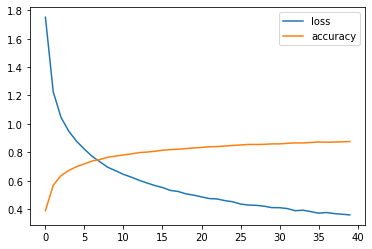

In [36]:
pd.DataFrame(history_2.history).plot()

In [38]:
predictions = model.predict(X_test)
predictions.round()

313/313 [==============================] - 9s 23ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [39]:
predictions = predictions.argmax(1)
predictions

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [41]:
cm = confusion_matrix(Y_test,predictions)
accuracy = accuracy_score(Y_test, predictions)

<AxesSubplot:>

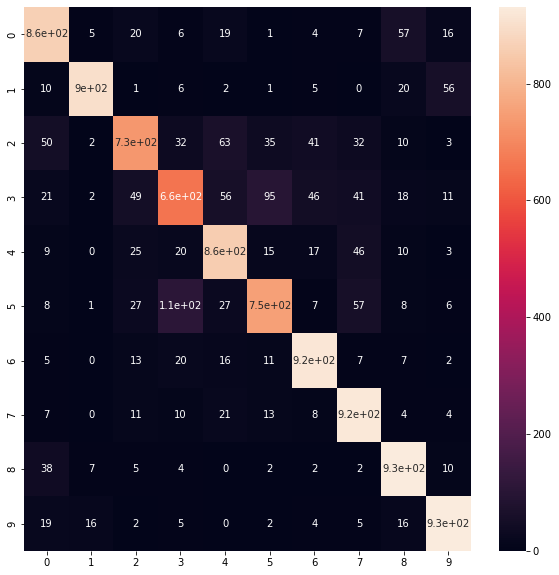

In [42]:
import seaborn as sns
cm = confusion_matrix(Y_test,predictions)
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot = True)

# Successfully classified images with an accuracy of 87.5%